# Football Data from Transfermarkt
- Kaggle Data URL

    - https://www.kaggle.com/datasets/davidcariboo/player-scores

## 1. 데이터 설명
- Transfermarkt 웹사이트에서 스크레이핑한 각종 축구 데이터 (매주 한번 파일 업데이트)
    - 주요 대회 시즌별 60,000개 이상의 경기
    - 모든 대회의 400개 이상의 클럽들
    - 30,000 이상의 선수들
    - 400,000개 이상의 선수 가치 기록
    - 1,200,000개 이상의 선수 출전 기록

- `csv` 파일 설명
    - `apperances` : 선수 출장 기록
    - `club_games` : 클럽별 경기 홈팀, 어웨이팀 정보
    - `clubs` : 리그별 속해 있는 클럽
    - `competitions` : 대회 정보
    - `game_events` : 경기별 이벤트 정보 (카드, 득점, 어시스트 등)
    - `game_lineups` : 경기별 선수의 선발, 교체 명단 등재 여부
    - `games` : 경기에 대한 정보 (시즌, 라운드, 홈팀, 어웨이팀, 순위)
    - `player_valuations` : Transfermarkt 웹사이트에서 매긴 선수의 가치
    - `players` : 선수에 대한 세부 정보

- 데이터베이스 스키마
    <img src="https://raw.githubusercontent.com/dcaribou/transfermarkt-datasets/master/resources/diagram.svg?sanitize=true" width="1700">

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%matplotlib inline

import os

from datetime import datetime
from datetime import timedelta
import missingno as msno

import warnings
warnings.filterwarnings(action='ignore')

pd.set_option("display.max_columns", None)

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 상위 폴더 이동 → tm_data 폴더로 이동 (csv 파일 존재)
os.chdir("../tm_data")

In [3]:
path = os.getcwd()
csv_dir_name = os.path.abspath(path)

In [4]:
csv_list = os.listdir()[0::2]

for csv_name in csv_list:
    # csv 파일 경로 불러오기
    file_path = os.path.join(csv_dir_name, csv_name)

    # .csv를 _df로 replace
    df_name = csv_name.replace(".csv", "_df")

    # 데이터 프레임 이름 자동 변수 생성 후 데이터셋 불러오기
    globals()[f"{df_name}"] = pd.read_csv(file_path)
    print(df_name)


appearances_df
clubs_df
club_games_df
competitions_df
games_df
game_events_df
game_lineups_df
players_df
player_valuations_df
transfers_df


In [5]:
# # 데이터 경로 지정
# # C:/Users/aryij/Documents/DataStudy/football-data-from-transfermarkt-data
# apps_path = "C:/Users/aryij/Documents/DataStudy/football-data-from-transfermarkt-data/appearances.csv"
# club_games_path = "C:/Users/aryij/Documents/DataStudy/football-data-from-transfermarkt-data/club_games.csv"
# clubs_path = "C:/Users/aryij/Documents/DataStudy/football-data-from-transfermarkt-data/clubs.csv"
# competitions_path = "C:/Users/aryij/Documents/DataStudy/football-data-from-transfermarkt-data/competitions.csv"
# game_events_path = "C:/Users/aryij/Documents/DataStudy/football-data-from-transfermarkt-data/game_events.csv"
# game_lineups_path = "C:/Users/aryij/Documents/DataStudy/football-data-from-transfermarkt-data/game_lineups.csv"
# games_path = "C:/Users/aryij/Documents/DataStudy/football-data-from-transfermarkt-data/games.csv"
# player_valuations_path = "C:/Users/aryij/Documents/DataStudy/football-data-from-transfermarkt-data/player_valuations.csv"
# players_path = "C:/Users/aryij/Documents/DataStudy/football-data-from-transfermarkt-data/players.csv"

# # 데이터셋 불러오기
# apps_df = pd.read_csv(apps_path)
# club_games_df = pd.read_csv(club_games_path)
# clubs_df = pd.read_csv(clubs_path)
# competitions_df = pd.read_csv(competitions_path)
# game_events_df = pd.read_csv(game_events_path)
# game_lineups_df = pd.read_csv(game_lineups_path)
# games_df = pd.read_csv(games_path)
# player_valuations_df = pd.read_csv(player_valuations_path)
# players_df = pd.read_csv(players_path)

In [6]:
appearances_df.head(3)

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45


In [7]:
club_games_df.head(3)

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
0,2320450,1468,0,NaN,Holger Bachthaler,24,2,NaN,Armin Veh,Home,0
1,2320460,1,3,NaN,Jürgen Luginger,86,1,NaN,Robin Dutt,Home,1
2,2320472,2036,4,NaN,Frank Schmidt,72,5,NaN,Alexander Schmidt,Home,0


In [8]:
clubs_df.tail(3)

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url
423,800,atalanta-bergamo,Atalanta BC,IT1,NaN,26,26.4,17,65.4,16,Gewiss Stadium,21747,+€5.35m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/atalanta-berga...
424,979,moreirense-fc,Moreirense FC,PO1,NaN,26,25.9,16,61.5,2,Estádio C. J. de Almeida Freitas,6153,+€2.10m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/moreirense-fc/...
425,984,west-bromwich-albion,West Bromwich Albion,GB1,NaN,25,27.8,8,32.0,4,The Hawthorns,26850,€-1.35m,NaN,2020,../data/raw/transfermarkt-scraper/2020/clubs.j...,https://www.transfermarkt.co.uk/west-bromwich-...


In [9]:
competitions_df.head(3)

,competition_id,competition_code,name,sub_type,type,country_id,country_name,domestic_league_code,confederation,url,is_major_national_league
0,CIT,italy-cup,italy-cup,domestic_cup,domestic_cup,75,Italy,IT1,europa,https://www.transfermarkt.co.uk/italy-cup/star...,False
1,NLSC,johan-cruijff-schaal,johan-cruijff-schaal,domestic_super_cup,other,122,Netherlands,NL1,europa,https://www.transfermarkt.co.uk/johan-cruijff-...,False
2,GRP,kypello-elladas,kypello-elladas,domestic_cup,domestic_cup,56,Greece,GR1,europa,https://www.transfermarkt.co.uk/kypello-ellada...,False


In [10]:
game_events_df.head(3)

,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id
0,2f41da30c471492e7d4a984951671677,2012-08-05,2211607,77,Cards,610,4425,"1. Yellow card , Mass confrontation",NaN,NaN
1,a72f7186d132775f234d3e2f7bc0ed5b,2012-08-05,2211607,77,Cards,383,33210,"1. Yellow card , Mass confrontation",NaN,NaN
2,b2d721eaed4692a5c59a92323689ef18,2012-08-05,2211607,3,Goals,383,36500,", Header, 1. Tournament Goal Assist: , Corner,...",NaN,56416.0


In [11]:
game_lineups_df.head(3)

,game_lineups_id,date,game_id,player_id,club_id,player_name,type,position,number,team_captain
0,b2dbe01c3656b06c8e23e9de714e26bb,2013-07-27,2317258,1443,610,Christian Poulsen,substitutes,Defensive Midfield,5,0
1,b50a3ec6d52fd1490aab42042ac4f738,2013-07-27,2317258,5017,610,Niklas Moisander,starting_lineup,Centre-Back,4,0
2,7d890e6d0ff8af84b065839966a0ec81,2013-07-27,2317258,9602,1090,Maarten Martens,substitutes,Left Winger,11,0


In [12]:
games_df.head(3)

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2321044,L1,2013,2. Matchday,2013-08-18,16,23,2,1,1.0,15.0,Jürgen Klopp,Torsten Lieberknecht,SIGNAL IDUNA PARK,80200.0,Peter Sippel,https://www.transfermarkt.co.uk/borussia-dortm...,4-2-3-1,4-3-2-1,Borussia Dortmund,Eintracht Braunschweig,2:1,domestic_league
1,2321060,L1,2013,3. Matchday,2013-08-25,23,24,0,2,18.0,11.0,Torsten Lieberknecht,Armin Veh,EINTRACHT-Stadion,23325.0,Wolfgang Stark,https://www.transfermarkt.co.uk/eintracht-brau...,4-3-2-1,4-2-3-1,Eintracht Braunschweig,Eintracht Frankfurt,0:2,domestic_league
2,2321086,L1,2013,6. Matchday,2013-09-21,4,16,1,1,15.0,1.0,Michael Wiesinger,Jürgen Klopp,Max-Morlock-Stadion,50000.0,Knut Kircher,https://www.transfermarkt.co.uk/1-fc-nuremberg...,4-2-3-1,4-2-3-1,1.FC Nuremberg,Borussia Dortmund,1:1,domestic_league


In [13]:
player_valuations_df.head(3)

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,405973,2000-01-20,150000,3057,BE1
1,342216,2001-07-20,100000,1241,SC1
2,3132,2003-12-09,400000,126,TR1


In [14]:
players_df.head(3)

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,1978-06-09,Centre-Forward,Attack,right,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,SS Lazio,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,1980-08-06,Goalkeeper,Goalkeeper,left,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,1981-01-30,Centre-Forward,Attack,NaN,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,PAOK Thessaloniki,1000000.0,34500000.0


### 1-1. `.info()` 확인

In [15]:
# df.info() 확인

dfs = [appearances_df, club_games_df, clubs_df, competitions_df, game_events_df, game_lineups_df, 
       games_df, player_valuations_df, players_df]

for df in dfs:
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589918 entries, 0 to 1589917
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   appearance_id           1589918 non-null  object
 1   game_id                 1589918 non-null  int64 
 2   player_id               1589918 non-null  int64 
 3   player_club_id          1589918 non-null  int64 
 4   player_current_club_id  1589918 non-null  int64 
 5   date                    1589918 non-null  object
 6   player_name             1589912 non-null  object
 7   competition_id          1589918 non-null  object
 8   yellow_cards            1589918 non-null  int64 
 9   red_cards               1589918 non-null  int64 
 10  goals                   1589918 non-null  int64 
 11  assists                 1589918 non-null  int64 
 12  minutes_played          1589918 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 157.7+ MB
None
<class 'pandas.core.

In [16]:
apps_copy = appearances_df.copy()

### 1-2. 사용 데이터셋
- 목표 : 선수의 시즌별 스탯 확인
    - `apperances` : 선수 출장 기록
    - `competitions` : 대회 정보
    - `players` : 선수에 대한 세부 정보
    - `player_valuations_df` : 선수 몸값에 대한 세부 정보
    
- 해볼 수 있는 것
    - 선수 스탯 예측
    - 선수 몸값 예측

In [17]:
appearances_df.describe(include="all")

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
count,1589918,1.589918e+06,1.589918e+06,1.589918e+06,1.589918e+06,1589918,1589912,1589918,1.589918e+06,1.589918e+06,1.589918e+06,1.589918e+06,1.589918e+06
unique,1589918,NaN,NaN,NaN,NaN,3504,24106,43,NaN,NaN,NaN,NaN,NaN
top,2231978_38004,NaN,NaN,NaN,NaN,2020-10-04,Danilo,IT1,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,1795,1087,131373,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.075831e+06,1.919924e+05,3.027634e+03,2.972576e+03,NaN,NaN,NaN,1.481359e-01,3.799567e-03,9.611062e-02,7.569699e-02,6.936879e+01
std,NaN,5.962029e+05,1.767539e+05,7.721338e+03,7.535401e+03,NaN,NaN,NaN,3.664959e-01,6.152343e-02,3.313519e-01,2.860339e-01,2.989155e+01
min,NaN,2.211607e+06,1.000000e+01,1.000000e+00,-1.000000e+00,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,NaN,2.578181e+06,5.635400e+04,2.890000e+02,2.810000e+02,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.600000e+01
50%,NaN,3.050271e+06,1.344020e+05,8.550000e+02,8.200000e+02,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01
75%,NaN,3.589364e+06,2.815520e+05,2.441000e+03,2.439000e+03,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01


In [18]:
competitions_df.describe(include="all")

,competition_id,competition_code,name,sub_type,type,country_id,country_name,domestic_league_code,confederation,url,is_major_national_league
count,44,44,44,44,44,44.000000,36,36,44,44,44
unique,44,43,43,12,4,NaN,14,14,1,44,2
top,CIT,premier-liga,premier-liga,first_tier,domestic_league,NaN,England,GB1,europa,https://www.transfermarkt.co.uk/italy-cup/star...,False
freq,1,2,2,14,14,NaN,4,4,44,1,39
mean,NaN,NaN,NaN,NaN,NaN,94.863636,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,70.518871,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,98.500000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,157.000000,NaN,NaN,NaN,NaN,NaN


In [19]:
players_df.describe()

,player_id,last_season,current_club_id,height_in_cm,market_value_in_eur,highest_market_value_in_eur
count,3.157300e+04,31573.000000,31573.000000,29252.000000,3.005300e+04,3.005300e+04
mean,3.343304e+05,2018.981313,4468.683400,182.275503,1.592112e+06,3.688923e+06
std,2.734439e+05,3.707125,10318.586224,6.906816,6.336732e+06,9.667975e+06
min,1.000000e+01,2012.000000,3.000000,17.000000,1.000000e+04,1.000000e+04
25%,1.022490e+05,2016.000000,403.000000,178.000000,1.000000e+05,2.500000e+05
50%,2.726980e+05,2020.000000,1063.000000,183.000000,2.500000e+05,8.000000e+05
75%,5.042590e+05,2023.000000,3057.000000,187.000000,6.500000e+05,2.800000e+06
max,1.270417e+06,2023.000000,83678.000000,207.000000,1.800000e+08,2.000000e+08


In [20]:
players_df.describe(include="object")

,first_name,last_name,name,player_code,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name
count,29562,31573,31573,31573,28757,29163,31126,31527,31387,31573,29003,19239,15818,31573,31573,31573,31573
unique,6802,23164,30905,30864,184,8372,182,9188,13,5,3,112,2752,25744,31573,14,424
top,David,García,Paulinho,paulinho,France,London,Spain,1996-01-19,Centre-Back,Defender,right,2023-06-30 00:00:00,Wasserman,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Kilmarnock FC
freq,207,66,12,12,2269,468,1913,20,5554,10052,20367,4610,460,5830,1,3124,185


#### 1-2-1. 사용 데이터셋 병합 함수 생성

In [21]:
# appearance_df, competitions_df, players_df, player_valuations_df merge 
# → 19-20 ~ 23-24 시즌 유럽 6대리그 데이터만 남김 (5시즌)
def app_comp_player_merge(apps_copy, competitions_df, players_df, player_valuations_df):
    # 데이터프레임의 date 컬럼 타입 datetime으로 변경
    apps_copy["date"] = pd.to_datetime(apps_copy["date"])
    player_valuations_df["date"] = pd.to_datetime(player_valuations_df["date"])
    
    # apps_copy와 competition_df competition_id를 기준으로 left join
    app_comp_df = pd.merge(apps_copy, competitions_df, how="left", on="competition_id")
    
    # 19-20 ~ 23-24 시즌 데이터만 남김 (5시즌)
    app_comp_df = app_comp_df[app_comp_df["date"]>="2019-06"]

    app_comp_player_df = pd.merge(app_comp_df, players_df, how="left", on="player_id")

    # 유럽 6대리그 (잉글랜드, 스페인, 이탈리아, 독일, 프랑스, 포르투갈 1부리그)만 필터링
    league_cond = ((app_comp_player_df.competition_id=="GB1") | (app_comp_player_df.competition_id=="ES1") | 
                   (app_comp_player_df.competition_id=="IT1") | (app_comp_player_df.competition_id=="L1") |
                   (app_comp_player_df.competition_id=="FR1") | (app_comp_player_df.competition_id=="PO1"))

    app_comp_player_df = app_comp_player_df[league_cond].reset_index(drop=True)

    # last_season 제대로 반영되지 않은 것들 발견하여, 새로 변경해준다
    # 8월 (코로나 시즌 7월까지 진행) 을 넘지 않으면 직전 시즌 연도로 변경
    app_comp_player_df["last_season"] = app_comp_player_df["date"].apply(lambda x : x.year if x.month>=8 else x.year-1)
    player_valuations_df["last_season"] = player_valuations_df["date"].apply(lambda x : x.year if x.month>=8 else x.year-1)

    # 수치형 변수 column 리스트
    num_cols = ["player_name", "last_season", "player_club_id", "yellow_cards", "red_cards","goals", "assists", "minutes_played"]

    # groupby 할 때 .agg() 적용 쉽게 하기 위하여 dict로 타입 변경
    num_cols_dict = dict.fromkeys(num_cols[3:], "sum")
    # 위에서 만든 딕셔너리에 last_season : count 넣어준다
    num_cols_dict["last_season"] = "count"
    
    # groupby를 통해, 이름, 연도 기준으로 수치형 변수 합산 → 시즌별 기록 파악하기 위함
    # last_season 컬럼은 count 한다 → 연도별 출장 횟수 카운팅하기 위함

    grouped = app_comp_player_df[num_cols].groupby(["player_name", "last_season", "player_club_id"])
    df_grouped = grouped.agg(num_cols_dict)
    df_grouped = df_grouped.rename(columns={"last_season":"total_apps"})
    df_grouped.reset_index(inplace=True)

    # player_name, last_season, player_club_id을 기준으로 merge 위해, 동일한 연도에 여러 게임으로 나뉘어 나오는 컬럼 제거
    not_merged_cols = num_cols[3:] + ["appearance_id", "game_id", "date", "url_x", "image_url", "url_y"]
    df_not_grouped = app_comp_player_df.loc[:, ~app_comp_player_df.columns.isin(not_merged_cols)].drop_duplicates()

    # 위에서 만든 df_grouped, df_not_grouped merge
    df_merged = pd.merge(df_grouped, df_not_grouped, how="left", on=["player_name", "last_season", "player_club_id"])

    # 시즌별 선수 몸값 계산 위해, player_valuations_df 파일 전처리
    player_val_grouped = player_valuations_df.groupby(["player_id", "last_season"])
    # 각 시즌별 마지막 몸값만 계산하여, market_value_per_season에 선언
    player_valuations_df["market_value_per_season"] = player_val_grouped["market_value_in_eur"].transform("last")
    pv_grouped = player_valuations_df.groupby(["player_id", 
                                               "last_season", 
                                               "market_value_per_season"]).count().reset_index()
    
    df_merged = pd.merge(df_merged, pv_grouped[["player_id", "last_season", "market_value_per_season"]], 
                         how="left", on=["player_id", "last_season"])

    
    # return df_grouped
    return df_merged

In [22]:
df_merged = app_comp_player_merge(apps_copy, competitions_df, players_df, player_valuations_df)
df_merged.head(3)

,player_name,last_season,player_club_id,yellow_cards,red_cards,goals,assists,minutes_played,total_apps,player_id,player_current_club_id,competition_id,competition_code,name_x,sub_type,type,country_id,country_name,domestic_league_code,confederation,is_major_national_league,first_name,last_name,name_y,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,contract_expiration_date,agent_name,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur,market_value_per_season
0,Aaron Connolly,2019,1237,0,0,3,2,1261,24,434207,1237,GB1,premier-league,premier-league,first_tier,domestic_league,189,England,GB1,europa,True,Aaron,Connolly,Aaron Connolly,1237,aaron-connolly,Ireland,Galway,Ireland,2000-01-28,Centre-Forward,Attack,right,174.0,2024-06-30 00:00:00,NaN,GB1,Brighton & Hove Albion,3500000.0,7000000.0,4000000.0
1,Aaron Connolly,2020,1237,0,0,2,1,791,17,434207,1237,GB1,premier-league,premier-league,first_tier,domestic_league,189,England,GB1,europa,True,Aaron,Connolly,Aaron Connolly,1237,aaron-connolly,Ireland,Galway,Ireland,2000-01-28,Centre-Forward,Attack,right,174.0,2024-06-30 00:00:00,NaN,GB1,Brighton & Hove Albion,3500000.0,7000000.0,7000000.0
2,Aaron Connolly,2021,1237,0,0,0,0,155,4,434207,1237,GB1,premier-league,premier-league,first_tier,domestic_league,189,England,GB1,europa,True,Aaron,Connolly,Aaron Connolly,1237,aaron-connolly,Ireland,Galway,Ireland,2000-01-28,Centre-Forward,Attack,right,174.0,2024-06-30 00:00:00,NaN,GB1,Brighton & Hove Albion,3500000.0,7000000.0,6000000.0


In [23]:
df_merged[df_merged.player_name=="Bryan Gil"]

,player_name,last_season,player_club_id,yellow_cards,red_cards,goals,assists,minutes_played,total_apps,player_id,player_current_club_id,competition_id,competition_code,name_x,sub_type,type,country_id,country_name,domestic_league_code,confederation,is_major_national_league,first_name,last_name,name_y,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,contract_expiration_date,agent_name,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur,market_value_per_season
2295,Bryan Gil,2019,368,2,0,0,0,63,2,537382,368,ES1,laliga,laliga,first_tier,domestic_league,157,Spain,ES1,europa,True,Bryan,Gil,Bryan Gil,148,bryan-gil,Spain,Barbate (Cádiz),Spain,2001-02-11,Left Winger,Attack,left,175.0,2025-06-30 00:00:00,IFM,GB1,Tottenham Hotspur,14000000.0,30000000.0,9000000.0
2296,Bryan Gil,2019,1244,2,0,1,0,553,12,537382,368,ES1,laliga,laliga,first_tier,domestic_league,157,Spain,ES1,europa,True,Bryan,Gil,Bryan Gil,148,bryan-gil,Spain,Barbate (Cádiz),Spain,2001-02-11,Left Winger,Attack,left,175.0,2025-06-30 00:00:00,IFM,GB1,Tottenham Hotspur,14000000.0,30000000.0,9000000.0
2297,Bryan Gil,2020,368,0,0,0,0,12,1,537382,368,ES1,laliga,laliga,first_tier,domestic_league,157,Spain,ES1,europa,True,Bryan,Gil,Bryan Gil,148,bryan-gil,Spain,Barbate (Cádiz),Spain,2001-02-11,Left Winger,Attack,left,175.0,2025-06-30 00:00:00,IFM,GB1,Tottenham Hotspur,14000000.0,30000000.0,30000000.0
2298,Bryan Gil,2020,1533,6,0,4,3,2271,28,537382,368,ES1,laliga,laliga,first_tier,domestic_league,157,Spain,ES1,europa,True,Bryan,Gil,Bryan Gil,148,bryan-gil,Spain,Barbate (Cádiz),Spain,2001-02-11,Left Winger,Attack,left,175.0,2025-06-30 00:00:00,IFM,GB1,Tottenham Hotspur,14000000.0,30000000.0,30000000.0
2299,Bryan Gil,2021,148,0,0,0,0,87,9,537382,368,GB1,premier-league,premier-league,first_tier,domestic_league,189,England,GB1,europa,True,Bryan,Gil,Bryan Gil,148,bryan-gil,Spain,Barbate (Cádiz),Spain,2001-02-11,Left Winger,Attack,left,175.0,2025-06-30 00:00:00,IFM,GB1,Tottenham Hotspur,14000000.0,30000000.0,18000000.0
2300,Bryan Gil,2021,1049,3,0,0,1,740,12,537382,368,ES1,laliga,laliga,first_tier,domestic_league,157,Spain,ES1,europa,True,Bryan,Gil,Bryan Gil,148,bryan-gil,Spain,Barbate (Cádiz),Spain,2001-02-11,Left Winger,Attack,left,175.0,2025-06-30 00:00:00,IFM,GB1,Tottenham Hotspur,14000000.0,30000000.0,18000000.0
2301,Bryan Gil,2022,148,1,0,0,1,148,4,537382,368,GB1,premier-league,premier-league,first_tier,domestic_league,189,England,GB1,europa,True,Bryan,Gil,Bryan Gil,148,bryan-gil,Spain,Barbate (Cádiz),Spain,2001-02-11,Left Winger,Attack,left,175.0,2025-06-30 00:00:00,IFM,GB1,Tottenham Hotspur,14000000.0,30000000.0,15000000.0
2302,Bryan Gil,2022,368,4,0,2,2,922,17,537382,368,ES1,laliga,laliga,first_tier,domestic_league,157,Spain,ES1,europa,True,Bryan,Gil,Bryan Gil,148,bryan-gil,Spain,Barbate (Cádiz),Spain,2001-02-11,Left Winger,Attack,left,175.0,2025-06-30 00:00:00,IFM,GB1,Tottenham Hotspur,14000000.0,30000000.0,15000000.0
2303,Bryan Gil,2023,148,0,0,0,0,201,11,537382,368,GB1,premier-league,premier-league,first_tier,domestic_league,189,England,GB1,europa,True,Bryan,Gil,Bryan Gil,148,bryan-gil,Spain,Barbate (Cádiz),Spain,2001-02-11,Left Winger,Attack,left,175.0,2025-06-30 00:00:00,IFM,GB1,Tottenham Hotspur,14000000.0,30000000.0,14000000.0


In [24]:
df_merged.shape

(16712, 41)

In [25]:
df_merged

,player_name,last_season,player_club_id,yellow_cards,red_cards,goals,assists,minutes_played,total_apps,player_id,player_current_club_id,competition_id,competition_code,name_x,sub_type,type,country_id,country_name,domestic_league_code,confederation,is_major_national_league,first_name,last_name,name_y,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,contract_expiration_date,agent_name,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur,market_value_per_season
0,Aaron Connolly,2019,1237,0,0,3,2,1261,24,434207,1237,GB1,premier-league,premier-league,first_tier,domestic_league,189,England,GB1,europa,True,Aaron,Connolly,Aaron Connolly,1237,aaron-connolly,Ireland,Galway,Ireland,2000-01-28,Centre-Forward,Attack,right,174.0,2024-06-30 00:00:00,NaN,GB1,Brighton & Hove Albion,3500000.0,7000000.0,4000000.0
1,Aaron Connolly,2020,1237,0,0,2,1,791,17,434207,1237,GB1,premier-league,premier-league,first_tier,domestic_league,189,England,GB1,europa,True,Aaron,Connolly,Aaron Connolly,1237,aaron-connolly,Ireland,Galway,Ireland,2000-01-28,Centre-Forward,Attack,right,174.0,2024-06-30 00:00:00,NaN,GB1,Brighton & Hove Albion,3500000.0,7000000.0,7000000.0
2,Aaron Connolly,2021,1237,0,0,0,0,155,4,434207,1237,GB1,premier-league,premier-league,first_tier,domestic_league,189,England,GB1,europa,True,Aaron,Connolly,Aaron Connolly,1237,aaron-connolly,Ireland,Galway,Ireland,2000-01-28,Centre-Forward,Attack,right,174.0,2024-06-30 00:00:00,NaN,GB1,Brighton & Hove Albion,3500000.0,7000000.0,6000000.0
3,Aaron Cresswell,2019,379,7,0,3,0,2730,31,92571,379,GB1,premier-league,premier-league,first_tier,domestic_league,189,England,GB1,europa,True,Aaron,Cresswell,Aaron Cresswell,379,aaron-cresswell,England,Liverpool,England,1989-12-15,Left-Back,Defender,left,170.0,2025-06-30 00:00:00,Unique Sports Group,GB1,West Ham United,900000.0,12000000.0,6500000.0
4,Aaron Cresswell,2020,379,3,0,0,8,3172,36,92571,379,GB1,premier-league,premier-league,first_tier,domestic_league,189,England,GB1,europa,True,Aaron,Cresswell,Aaron Cresswell,379,aaron-cresswell,England,Liverpool,England,1989-12-15,Left-Back,Defender,left,170.0,2025-06-30 00:00:00,Unique Sports Group,GB1,West Ham United,900000.0,12000000.0,5000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16707,Ömer Toprak,2020,86,1,0,2,0,1948,26,43512,16,L1,bundesliga,bundesliga,first_tier,domestic_league,40,Germany,L1,europa,True,Ömer,Toprak,Ömer Toprak,589,omer-toprak,Germany,Ravensburg,Türkiye,1989-07-21,Centre-Back,Defender,right,187.0,NaN,Sports360 GmbH,TR1,Antalyaspor,300000.0,20000000.0,2500000.0
16708,Örjan Nyland,2019,405,0,0,0,0,537,7,73517,23826,GB1,premier-league,premier-league,first_tier,domestic_league,189,England,GB1,europa,True,Ørjan,Nyland,Ørjan Nyland,368,orjan-nyland,Norway,Volda,Norway,1990-09-10,Goalkeeper,Goalkeeper,right,192.0,2026-06-30 00:00:00,NaN,ES1,Sevilla FC,1400000.0,3000000.0,1200000.0
16709,Örjan Nyland,2022,23826,0,0,0,1,180,2,73517,23826,L1,bundesliga,bundesliga,first_tier,domestic_league,40,Germany,L1,europa,True,Ørjan,Nyland,Ørjan Nyland,368,orjan-nyland,Norway,Volda,Norway,1990-09-10,Goalkeeper,Goalkeeper,right,192.0,2026-06-30 00:00:00,NaN,ES1,Sevilla FC,1400000.0,3000000.0,600000.0
16710,Örjan Nyland,2023,368,1,0,0,0,2160,24,73517,23826,ES1,laliga,laliga,first_tier,domestic_league,157,Spain,ES1,europa,True,Ørjan,Nyland,Ørjan Nyland,368,orjan-nyland,Norway,Volda,Norway,1990-09-10,Goalkeeper,Goalkeeper,right,192.0,2026-06-30 00:00:00,NaN,ES1,Sevilla FC,1400000.0,3000000.0,1400000.0


In [26]:
os.chdir("../player-value-prediction-from-transfermarkt")

In [27]:
df_merged.to_csv("data/df_merged.csv", index=False)

## 2. 결측치 처리

### 2-1. 결측치 설명
- `완전 무작위 결측 (MCAR : Missing Completely At Random)`

    - 변수 상에서 발생한 결측치가 다른 변수들과 아무런 상관이 없는 경우 완전 무작위 결측이라고 부른다.<br>
    대부분의 결측치 처리 패키지가 MCAR을 가정으로 하고 있고 보통 우리가 생각하는 결측치라고 생각하면 된다.   
    예를 들어, 데이터를 깜박하고 입력 안하거나 전산오류로 누락된 경우이다.   
    이러한 결측치는 보통 제거하거나 데이터 셋에서 단순 무작위 표본추출을 통해 완벽한 데이터셋으로 만들 수 있다.<br>

- `무작위 결측 (MAR : Missing At Random)`

    - 결측값이 결측된 변수와는 관련이 없지만 다른변수와는 관련이 있는 경우 무작위 결측이라고 부른다.  
    예를 들어, 여성이 남성보다 체중을 기입하지 않는다. 라고 하면 체중에 결측값이 생기지만,  
    이는 체중 변수와 관련이 있는 것이 아닌 성별 변수와 관련이 있다. 
<br>

- `비 무작위 결측 (MNAR : Missing Not At Random)`

    - 위 두가지 유형이 아닌 경우 MNAR이라고 하고, 결측값이 결측된 변수와 관련이 있는 경우 비 무작위 결측이라고 한다.  
    예를 들어, 서비스에 불만족한 고객들은 만족도 설문에 응답하지 않는다.  
    
- 링크 : https://syj9700.tistory.com/10

### 2-2. 결측치 구분 예시
- 구분 예시
    * 3번 상태 (MNAR)가 아니라면, 이 결측값 발생이 어느정도 독립적으로 발생하지 않았을까? 라고 생각 가능한 상태가 되고,
    이는 완벽하게 우연히 발생했다면 1번 완전 무작위 결측이 된다 (MCAR)

    * 즉, 결측값의 발생에 뚜렷한 어떤 인과 관계가 숨어있는지 여부로 구분지으면 된다 
        

    * `MCAR(Missing Completely At Random)`
        
        + 특정 column(c_k)의 결측 여부가 완전히 random으로 발생하는 경우,  

        + 즉 c_k가 다른 c_1, c_2, ...와는 관련이 없을 때를 가리킴


    * `MAR(Missing At Random)  `


        + 특정 c_k의 결측 여부가 다른 c_1, c_2, ... 중 몇몇과 관련이 있는 경우  

        + 예를 들면, 소득수준(=c_1)에 따라 학업성취도(=c_k)의 결측 여부가 관련이 있을 경우
        

    * `MNAR(Missing Not At Random, non ignorable)`  

        + 특정 c_k의 결측 여부가 c_k의 값과 관련이 있는 경우  
        
        + 예를 들면, 학업성취도가 낮은 학생들이 학업성취도에 응답하지 않는 경우   
        
        + 우울증이 너무 심한 응답자들이 우울증 문항에 허위 기술을 하거나,  
        정치적, 종교적인 이유로 실제와 전혀 다른 응답하는 경우  
        
        + 위의 예시처럼 설문지 응답에서 중요한 특정 집단이 의도적으로 자신을 감춰버린 상태

    * 링크 : https://gooopy.tistory.com/43  

### 2-3. 결측치 비율에 따른 결측치 처리 방법 선택
- 결측치 비율 `10% 미만` : 제거 또는 대체
- 결측치 비율 `10% 이상 20% 미만` : 모델 기반 처리
- 결측치 비율 `20% 이상` : 모델 기반 처리
- 출처 : https://cheris8.github.io/data%20analysis/DP-NA-Imputation/

In [28]:
df_merged.columns

Index(['player_name', 'last_season', 'player_club_id', 'yellow_cards',
       'red_cards', 'goals', 'assists', 'minutes_played', 'total_apps',
       'player_id', 'player_current_club_id', 'competition_id',
       'competition_code', 'name_x', 'sub_type', 'type', 'country_id',
       'country_name', 'domestic_league_code', 'confederation',
       'is_major_national_league', 'first_name', 'last_name', 'name_y',
       'current_club_id', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'contract_expiration_date', 'agent_name',
       'current_club_domestic_competition_id', 'current_club_name',
       'market_value_in_eur', 'highest_market_value_in_eur',
       'market_value_per_season'],
      dtype='object')

In [29]:
len(df_merged.columns)

41

In [30]:
# 결측치 확인
df_merged.isnull().sum()[:20]

player_name               0
last_season               0
player_club_id            0
yellow_cards              0
red_cards                 0
goals                     0
assists                   0
minutes_played            0
total_apps                0
player_id                 0
player_current_club_id    0
competition_id            0
competition_code          0
name_x                    0
sub_type                  0
type                      0
country_id                0
country_name              0
domestic_league_code      0
confederation             0
dtype: int64

In [31]:
df_merged.isnull().sum()[20:]

is_major_national_league                   0
first_name                              1628
last_name                                  0
name_y                                     0
current_club_id                            0
player_code                                0
country_of_birth                         434
city_of_birth                             99
country_of_citizenship                   343
date_of_birth                              2
sub_position                               4
position                                   0
foot                                     133
height_in_cm                              86
contract_expiration_date                2501
agent_name                              4530
current_club_domestic_competition_id       0
current_club_name                          0
market_value_in_eur                       52
highest_market_value_in_eur               52
market_value_per_season                  195
dtype: int64

#### 2-3-1. 결측치 비율 시각화

In [32]:
# 결측치 비율 구함
null_total = df_merged.isnull().sum()
null_count = df_merged.isnull().count()
null_pct = round((null_total/null_count)*100, 1)

# 결측치 개수, 퍼센트 데이터프레임으로 생성
missing = pd.concat([null_total, null_pct], axis=1, keys=["Total", "Percent"])
missing


,Total,Percent
player_name,0,0.0
last_season,0,0.0
player_club_id,0,0.0
yellow_cards,0,0.0
red_cards,0,0.0
goals,0,0.0
assists,0,0.0
minutes_played,0,0.0
total_apps,0,0.0
player_id,0,0.0


#### 2-3-2. `barplot` 사용하여 결측치 비율 시각화

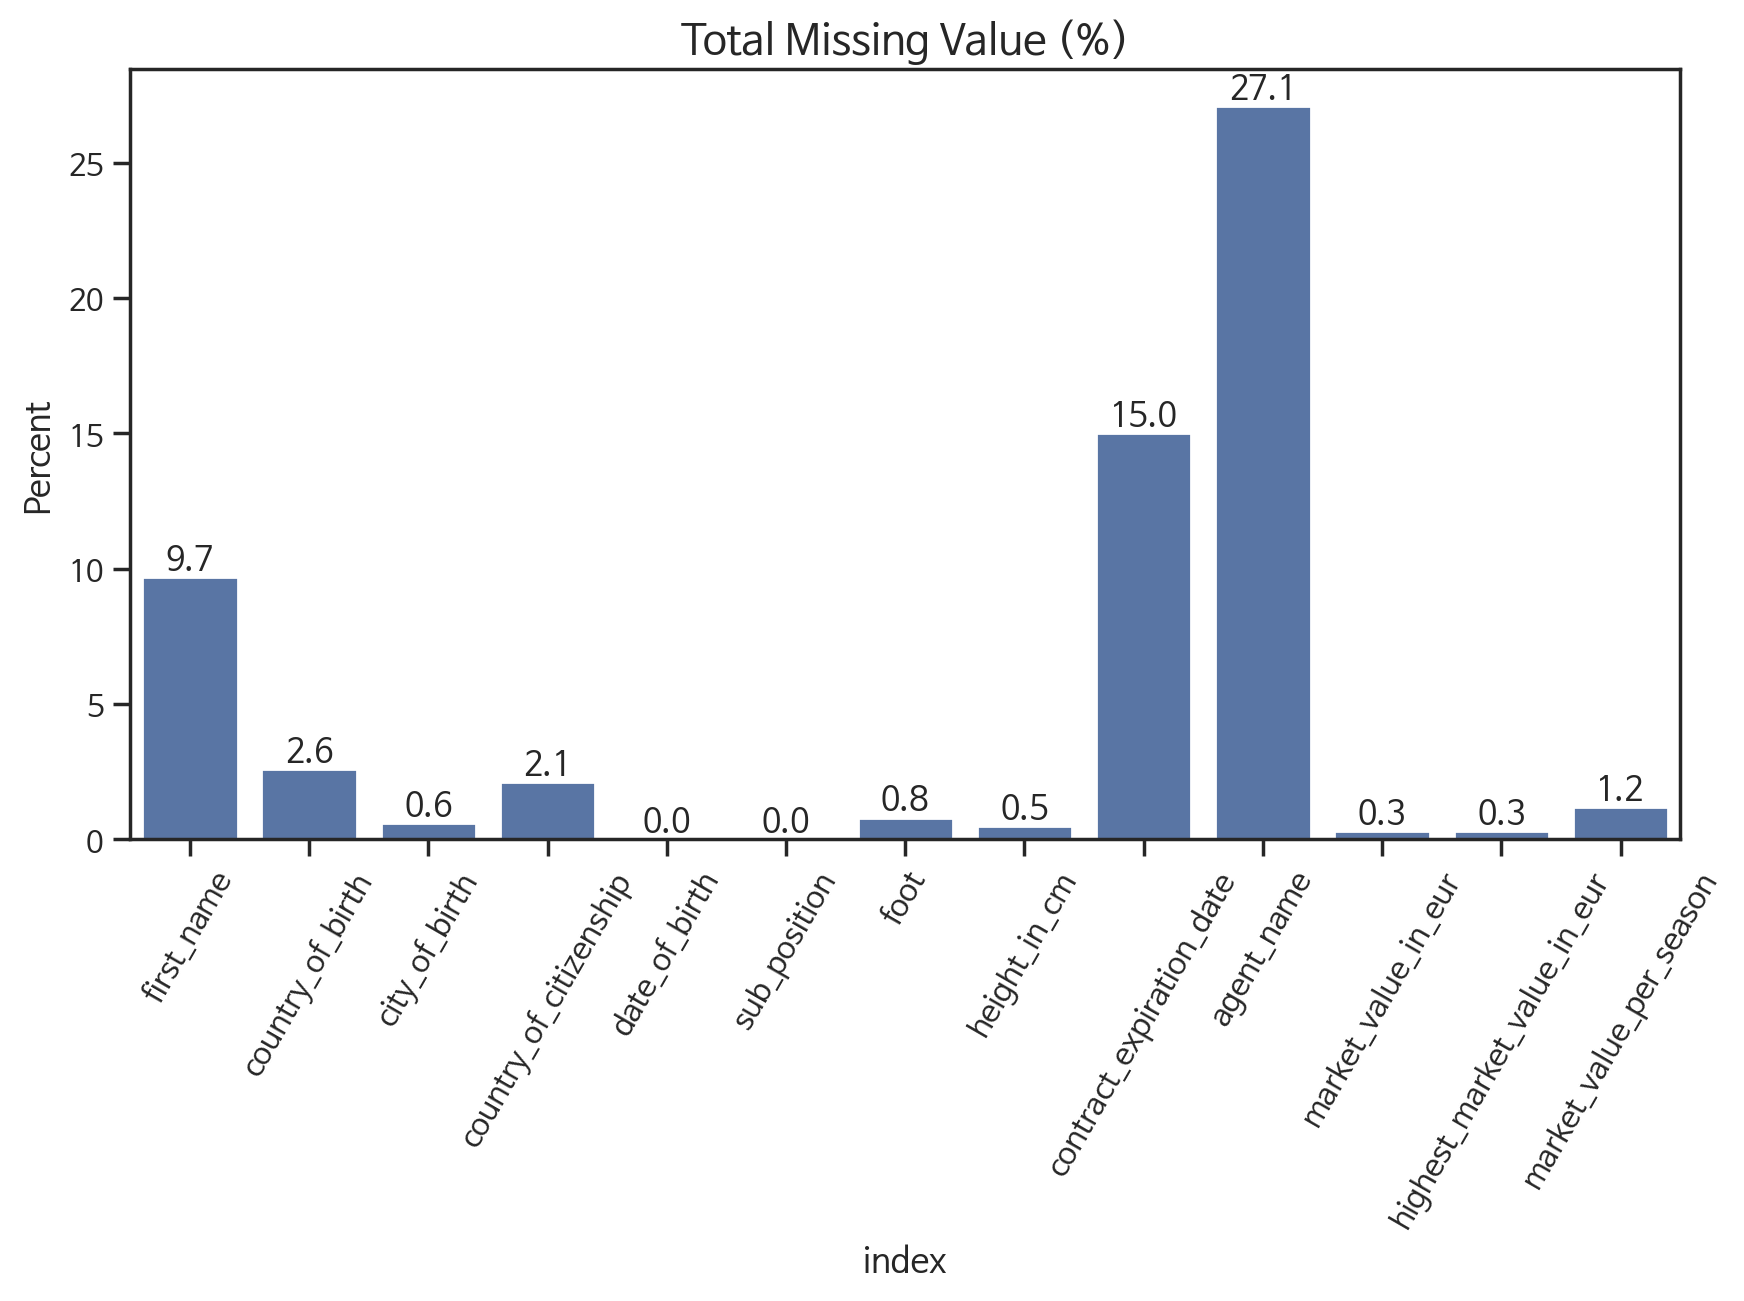

In [33]:
# 결측치 비율 시각화
plt.figure(figsize=(10, 5))
sns_pct = sns.barplot(x="index", y="Percent", data=missing[missing["Total"]!=0].reset_index())
sns_pct.set_xticklabels(sns_pct.get_xticklabels(), rotation=60)

# bar 그래프 상단에 비율 (%) 표기
for bar in sns_pct.patches:
    height = bar.get_height()                   # .get_height() : y좌표

    plt.text(bar.get_x() + bar.get_width()/2,   # 퍼센트 글자 위치
             height+0.3,                        # 퍼센트 글자 높이
             "%.1f" % height,                   # 퍼센트 소수점 지정
             ha="center")                       # 가운데 정렬

# 시각화 제목 이름, 폰트 크기 지정
sns_pct.set_title("Total Missing Value (%)", fontsize=15)
plt.show()

### 2-4. `country_of_citizenship` 컬럼 결측치 제거

#### 2-4-1. `country_of_citizenship` 컬럼 결측치 
- 결측치 438개 발견

- 결측치 랜덤하게 발생했는지 확인
    - 리그별 선수 국적 결측치 확인
        - 대체로 한쪽에 편중되지 않음, 다른 변수들과 상관 없이 전산 오류 추정 → 완전 무작위 결측 (`MCAR`)       

In [34]:
# 리그별 선수 국적 결측치 확인
df_merged[df_merged.country_of_citizenship.isnull()]["competition_code"].value_counts()

competition_code
ligue-1               85
liga-portugal-bwin    77
serie-a               55
premier-league        52
laliga                39
bundesliga            35
Name: count, dtype: int64

#### 2-4-2. 결측치 제거 함수 생성
- 원본 데이터셋과 동일한 출처 (transfermarkt)에서 가져온 새로운 데이터셋 발견
    - references : https://www.kaggle.com/datasets/mexwell/football-data-from-transfermarkt?select=players.csv
    
- 해당 데이터셋의 `country_of_citizenship` 컬럼과 `merge`하여 결측치 최대한 대체
- 이후에도 채워지지 않은 결측치는 transfermarkt 웹사이트에서 선수 검색하여 직접 대체

In [35]:
df_merged[df_merged.country_of_citizenship.isnull()]["player_name"].nunique()

155

In [36]:
def no_null_citizenship_height_foot(df_merged):
    player2_df = pd.read_csv("C:/Users/aryij/Documents/DataStudy/archive(4)/players.csv")
    
    # name 컬럼으로 merge하기 위해, df_merged 데이터프레임의 name_y 컬럼 이름 name으로 변경
    df_merged.rename(columns={"name_y" : "name"}, inplace=True)
    merged = pd.merge(df_merged, player2_df[["name", "country_of_citizenship"]], how="left", on="name")

    # merge된 컬럼 기반하여 원본 컬럼 (country_of_citizenship_x)의 결측치를 country_of_citizenship_y에서 대체
    merged["country_of_citizenship"] = merged["country_of_citizenship_x"].fillna(merged["country_of_citizenship_y"])

    # merge 이후에도 채워지지 않은 결측치는 직접 transfermarkt 웹사이트에서 검색하여 채워준다
    # nan_name = ["Brazil", "England", "Argentina", "Australia", "England", "England", "Jamaica", "France", "England",  
    #             "France", "Italy", "Spain", "Spain", "Spain", "England", "Italy", "Germany", "Spain"]
    
    # 데이터프레임 결측치 채우기 쉽게 하기 위해 merge한 파일의 결측치와 동일한 index로 Series 생성
    # nan_names = pd.Series(nan_name, index=merged[merged["country_of_citizenship"].isnull()].index)
    # 결측치 index, column 정보 nan_search에 선언
    nan_search = merged[merged["country_of_citizenship"].isnull()].index, "country_of_citizenship"
    
    # 결측치 대체
    # merged.loc[merged[merged["country_of_citizenship"].isnull()].index, "country_of_citizenship"] = merged.loc[merged[merged["country_of_citizenship"].isnull()].index, "country_of_citizenship"].fillna(nan_names)
    # merged.loc[nan_search] = merged.loc[nan_search].fillna(nan_names)

    merged2 = pd.merge(merged, player2_df[["player_id", "foot", "height_in_cm"]], on="player_id", how="left")
    merged2["foot"] = merged2["foot_x"].fillna(merged2["foot_y"])
    merged2["height_in_cm"] = merged2["height_in_cm_x"].fillna(merged2["height_in_cm_y"])

    drop_cols = ['player_club_id', 'player_id', 'player_current_club_id', 'competition_id', 'name_x', 'sub_type', 'type', 'country_id', 'country_name', 
             'domestic_league_code', 'confederation', 'first_name', 'last_name', 'name', 'current_club_id', 'player_code', 
             'country_of_birth', 'city_of_birth', 'country_of_citizenship_x', 'position', 'contract_expiration_date', 'agent_name', 
             'current_club_domestic_competition_id','market_value_in_eur', 'country_of_citizenship_y', 'height_in_cm_x', 'height_in_cm_y', 'foot_x', 'foot_y']
    
    merged2.drop(columns=drop_cols, inplace=True)

    return merged2   

In [37]:
merged_again = no_null_citizenship_height_foot(df_merged)
merged_again

,player_name,last_season,yellow_cards,red_cards,goals,assists,minutes_played,total_apps,competition_code,is_major_national_league,date_of_birth,sub_position,current_club_name,highest_market_value_in_eur,market_value_per_season,country_of_citizenship,foot,height_in_cm
0,Aaron Connolly,2019,0,0,3,2,1261,24,premier-league,True,2000-01-28,Centre-Forward,Brighton & Hove Albion,7000000.0,4000000.0,Ireland,right,174.0
1,Aaron Connolly,2020,0,0,2,1,791,17,premier-league,True,2000-01-28,Centre-Forward,Brighton & Hove Albion,7000000.0,7000000.0,Ireland,right,174.0
2,Aaron Connolly,2021,0,0,0,0,155,4,premier-league,True,2000-01-28,Centre-Forward,Brighton & Hove Albion,7000000.0,6000000.0,Ireland,right,174.0
3,Aaron Cresswell,2019,7,0,3,0,2730,31,premier-league,True,1989-12-15,Left-Back,West Ham United,12000000.0,6500000.0,England,left,170.0
4,Aaron Cresswell,2020,3,0,0,8,3172,36,premier-league,True,1989-12-15,Left-Back,West Ham United,12000000.0,5000000.0,England,left,170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18110,Ömer Toprak,2020,1,0,2,0,1948,26,bundesliga,True,1989-07-21,Centre-Back,Antalyaspor,20000000.0,2500000.0,Türkiye,right,187.0
18111,Örjan Nyland,2019,0,0,0,0,537,7,premier-league,True,1990-09-10,Goalkeeper,Sevilla FC,3000000.0,1200000.0,Norway,right,192.0
18112,Örjan Nyland,2022,0,0,0,1,180,2,bundesliga,True,1990-09-10,Goalkeeper,Sevilla FC,3000000.0,600000.0,Norway,right,192.0
18113,Örjan Nyland,2023,1,0,0,0,2160,24,laliga,True,1990-09-10,Goalkeeper,Sevilla FC,3000000.0,1400000.0,Norway,right,192.0


In [38]:
merged_again[merged_again["country_of_citizenship"].isnull()]

,player_name,last_season,yellow_cards,red_cards,goals,assists,minutes_played,total_apps,competition_code,is_major_national_league,date_of_birth,sub_position,current_club_name,highest_market_value_in_eur,market_value_per_season,country_of_citizenship,foot,height_in_cm
1009,Anderson Cordeiro,2022,1,0,0,0,22,2,liga-portugal-bwin,False,1998-10-10,Left Winger,Casa Pia AC,500000.0,450000.0,NaN,left,176.0
1977,Ben Pearson,2022,1,0,0,0,284,7,premier-league,True,1995-01-04,Central Midfield,AFC Bournemouth,3000000.0,2200000.0,NaN,right,176.0
2267,Braian Cufré,2022,0,0,0,0,217,5,laliga,True,1996-12-15,Left-Back,RCD Mallorca,5000000.0,1200000.0,NaN,left,178.0
7273,Jason Bahamboula,2022,0,0,0,0,8,1,liga-portugal-bwin,False,2001-06-15,Right Winger,Vitória Guimarães SC,NaN,NaN,NaN,right,178.0
8919,Kami Doyle,2022,0,0,0,0,6,1,premier-league,True,2005-08-01,Attacking Midfield,Southampton FC,NaN,NaN,NaN,NaN,NaN
9750,Lilian Rao-Lisoa,2022,0,0,1,0,166,7,ligue-1,True,2000-06-16,Right-Back,Angers SCO,600000.0,200000.0,NaN,right,178.0
13223,Pablo Rodríguez,2022,0,0,0,0,50,4,serie-a,True,2001-08-04,Second Striker,US Lecce,2000000.0,2000000.0,NaN,right,178.0
14728,Roberto Arroyo,2022,0,0,0,0,14,1,laliga,True,2003-08-25,Centre-Forward,Real Valladolid CF,300000.0,300000.0,NaN,both,181.0
15396,Samuel Amo-Ameyaw,2022,0,0,0,0,3,1,premier-league,True,2006-07-18,Left Winger,Southampton FC,300000.0,NaN,NaN,NaN,NaN
16782,Tommaso Barbieri,2022,0,0,0,0,109,3,serie-a,True,2002-08-26,Right-Back,Juventus FC,1200000.0,1200000.0,NaN,right,181.0


In [39]:
# 함수 적용 후 결측치 대체된 것 확인
merged_again.isnull().sum()

player_name                      0
last_season                      0
yellow_cards                     0
red_cards                        0
goals                            0
assists                          0
minutes_played                   0
total_apps                       0
competition_code                 0
is_major_national_league         0
date_of_birth                    2
sub_position                     4
current_club_name                0
highest_market_value_in_eur     59
market_value_per_season        217
country_of_citizenship          12
foot                           135
height_in_cm                    87
dtype: int64

In [40]:
merged_again.to_csv("data/merged_again.csv", index=False)

#### 2-4-3. 결측치 비율 시각화

In [41]:
# 결측치 비율 구함
null_total = merged_again.isnull().sum()
null_count = merged_again.isnull().count()
null_pct = round((null_total/null_count)*100, 1)

# 결측치 개수, 퍼센트 데이터프레임으로 생성
missing = pd.concat([null_total, null_pct], axis=1, keys=["Total", "Percent"])
missing

,Total,Percent
player_name,0,0.0
last_season,0,0.0
yellow_cards,0,0.0
red_cards,0,0.0
goals,0,0.0
assists,0,0.0
minutes_played,0,0.0
total_apps,0,0.0
competition_code,0,0.0
is_major_national_league,0,0.0


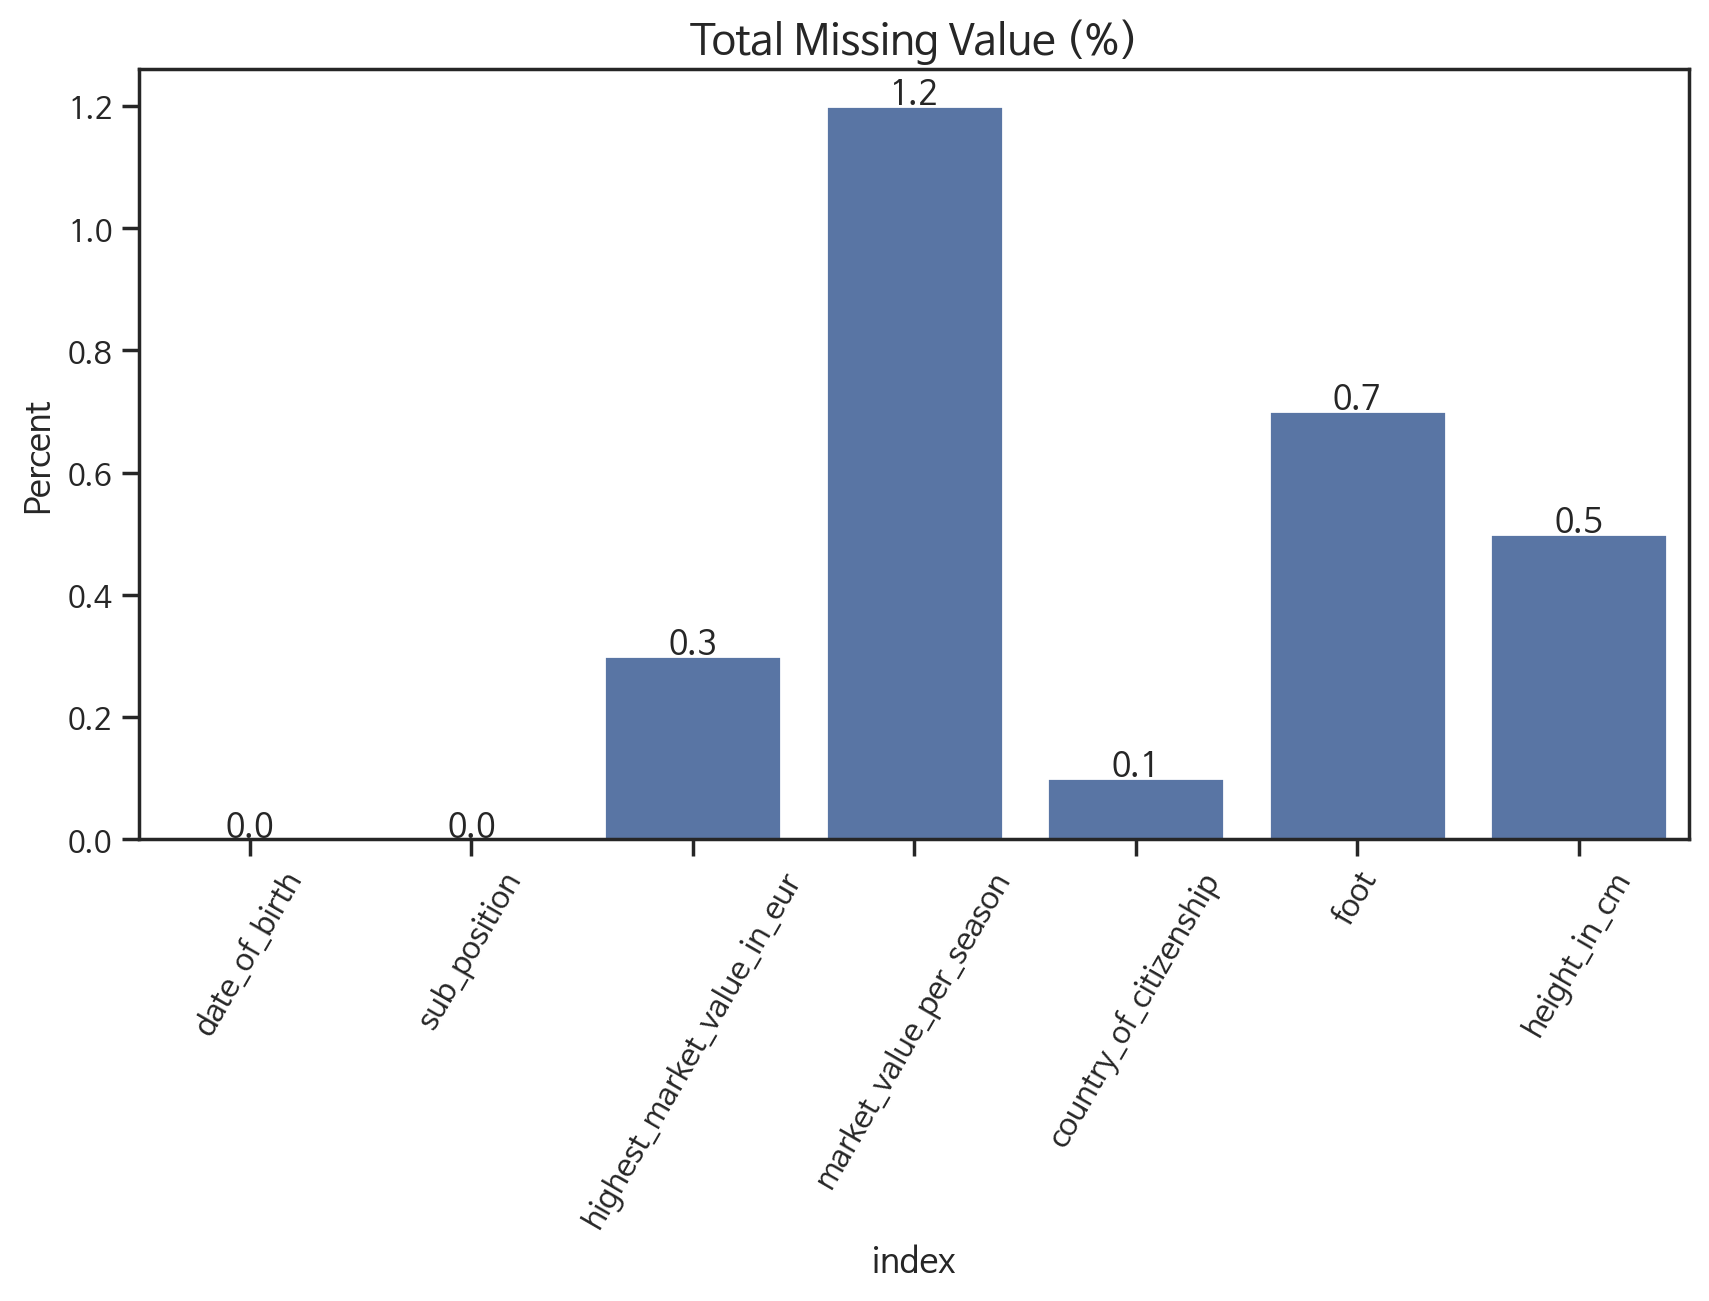

In [42]:
# 결측치 비율 시각화
plt.figure(figsize=(10, 5))
sns_pct = sns.barplot(x="index", y="Percent", data=missing[missing["Total"]!=0].reset_index())
sns_pct.set_xticklabels(sns_pct.get_xticklabels(), rotation=60)

# bar 그래프 상단에 비율 (%) 표기
for bar in sns_pct.patches:
    height = bar.get_height()                   # .get_height() : y좌표

    plt.text(bar.get_x() + bar.get_width()/2,   # 퍼센트 글자 위치
             height+0.005,                        # 퍼센트 글자 높이
             "%.1f" % height,                   # 퍼센트 소수점 지정
             ha="center")                       # 가운데 정렬

# 시각화 제목 이름, 폰트 크기 지정
sns_pct.set_title("Total Missing Value (%)", fontsize=15)
plt.show()

#### 2-4-4-. 결측치 제거
- 결측치 처리 방법
    - 결측치 비율 `10% 미만` : 제거 또는 대체
    - 결측치 비율 `10% 이상 20% 미만` : 모델 기반 처리
    - 결측치 비율 `20% 이상` : 모델 기반 처리

- 결측치 대체로 `1%` 미만 → 제거 

In [43]:
# 결측치 처리 전과 처리 후 비교
print("결측치 drop 전 데이터프레임 row 수 :", merged_again.shape[0])
print("결측치 drop 후 데이터프레임 row 수 :", merged_again.dropna().shape[0])
print("결측치 drop 비율", round((merged_again.shape[0]-merged_again.dropna().shape[0])/merged_again.shape[0], 2), "%")

결측치 drop 전 데이터프레임 row 수 : 18115
결측치 drop 후 데이터프레임 row 수 : 17735
결측치 drop 비율 0.02 %


In [44]:
df_dropped = merged_again.dropna()

In [45]:
df_dropped.head()

,player_name,last_season,yellow_cards,red_cards,goals,assists,minutes_played,total_apps,competition_code,is_major_national_league,date_of_birth,sub_position,current_club_name,highest_market_value_in_eur,market_value_per_season,country_of_citizenship,foot,height_in_cm
0,Aaron Connolly,2019,0,0,3,2,1261,24,premier-league,True,2000-01-28,Centre-Forward,Brighton & Hove Albion,7000000.0,4000000.0,Ireland,right,174.0
1,Aaron Connolly,2020,0,0,2,1,791,17,premier-league,True,2000-01-28,Centre-Forward,Brighton & Hove Albion,7000000.0,7000000.0,Ireland,right,174.0
2,Aaron Connolly,2021,0,0,0,0,155,4,premier-league,True,2000-01-28,Centre-Forward,Brighton & Hove Albion,7000000.0,6000000.0,Ireland,right,174.0
3,Aaron Cresswell,2019,7,0,3,0,2730,31,premier-league,True,1989-12-15,Left-Back,West Ham United,12000000.0,6500000.0,England,left,170.0
4,Aaron Cresswell,2020,3,0,0,8,3172,36,premier-league,True,1989-12-15,Left-Back,West Ham United,12000000.0,5000000.0,England,left,170.0


In [46]:
df_dropped.rename(columns={"last_season" : "start_season", 
                          "highest_market_value_in_eur" : "highest_market_value",
                          "sub_position" : "position", 
                          "country_of_citizenship" : "country"}, inplace=True)

In [47]:
# df_dropped reset_index 시행
df_dropped.reset_index(drop=True, inplace=True)

In [48]:
# 중복 확인
df_dropped[df_dropped.duplicated(keep=False)]

,player_name,start_season,yellow_cards,red_cards,goals,assists,minutes_played,total_apps,competition_code,is_major_national_league,date_of_birth,position,current_club_name,highest_market_value,market_value_per_season,country,foot,height_in_cm
23,Aaron Ramsey,2019,2,0,3,1,1011,23,serie-a,True,1990-12-26,Central Midfield,OGC Nice,45000000.0,28000000.0,Wales,right,178.0
24,Aaron Ramsey,2019,2,0,3,1,1011,23,serie-a,True,1990-12-26,Central Midfield,OGC Nice,45000000.0,28000000.0,Wales,right,178.0
25,Aaron Ramsey,2020,2,0,2,5,1132,23,serie-a,True,1990-12-26,Central Midfield,OGC Nice,45000000.0,14000000.0,Wales,right,178.0
26,Aaron Ramsey,2020,2,0,2,5,1132,23,serie-a,True,1990-12-26,Central Midfield,OGC Nice,45000000.0,14000000.0,Wales,right,178.0
27,Aaron Ramsey,2021,0,0,0,0,98,3,serie-a,True,1990-12-26,Central Midfield,OGC Nice,45000000.0,3000000.0,Wales,right,178.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17611,Álvaro González,2021,1,0,0,0,451,6,ligue-1,True,1990-01-08,Centre-Back,Olympique Marseille,9000000.0,2500000.0,Spain,right,182.0
17696,Óscar Gil,2021,7,0,0,2,1697,22,laliga,True,1998-04-26,Right-Back,RCD Espanyol Barcelona,3000000.0,3000000.0,Spain,both,175.0
17697,Óscar Gil,2021,7,0,0,2,1697,22,laliga,True,1998-04-26,Right-Back,RCD Espanyol Barcelona,3000000.0,3000000.0,Spain,both,175.0
17698,Óscar Gil,2022,14,0,0,1,2567,33,laliga,True,1998-04-26,Right-Back,RCD Espanyol Barcelona,3000000.0,3000000.0,Spain,both,175.0


In [49]:
# 중복 제거
df_dropped = df_dropped.drop_duplicates()
df_dropped.reset_index(drop=True, inplace=True)

In [50]:
df_dropped.head()

,player_name,start_season,yellow_cards,red_cards,goals,assists,minutes_played,total_apps,competition_code,is_major_national_league,date_of_birth,position,current_club_name,highest_market_value,market_value_per_season,country,foot,height_in_cm
0,Aaron Connolly,2019,0,0,3,2,1261,24,premier-league,True,2000-01-28,Centre-Forward,Brighton & Hove Albion,7000000.0,4000000.0,Ireland,right,174.0
1,Aaron Connolly,2020,0,0,2,1,791,17,premier-league,True,2000-01-28,Centre-Forward,Brighton & Hove Albion,7000000.0,7000000.0,Ireland,right,174.0
2,Aaron Connolly,2021,0,0,0,0,155,4,premier-league,True,2000-01-28,Centre-Forward,Brighton & Hove Albion,7000000.0,6000000.0,Ireland,right,174.0
3,Aaron Cresswell,2019,7,0,3,0,2730,31,premier-league,True,1989-12-15,Left-Back,West Ham United,12000000.0,6500000.0,England,left,170.0
4,Aaron Cresswell,2020,3,0,0,8,3172,36,premier-league,True,1989-12-15,Left-Back,West Ham United,12000000.0,5000000.0,England,left,170.0


In [55]:
vitinha_idx = df_dropped[(df_dropped["player_name"]=="Vitinha") & (df_dropped["current_club_name"]=="Paris Saint-Germain")].index
df_dropped.loc[vitinha_idx, "player_name"] ="Vitor Ferreira"

## 3. 추가 데이터 보충
- 해당 기간 (1920 ~ 2324 시즌) understat 데이터 추가
- https://github.com/abrarhossainhimself/understat_scraping_project
- https://www.kaggle.com/datasets/abrarhossainhimself/understat-data-for-teams-players-2014-present

In [57]:
os.getcwd()

'c:\\Users\\aryij\\Documents\\DataStudy\\player-value-prediction-from-transfermarkt'

In [58]:
# os.chdir("data/understat")

In [59]:
# understat_path = os.getcwd()
# understat_dir = os.path.abspath(understat_path)
# os.listdir()

In [71]:
# portugal league는 understat에서 데이터를 제공하지 않기 때문에 삭제
df_dropped = df_dropped[df_dropped["competition_code"]!="liga-portugal-bwin"]
df_dropped_copy = df_dropped.copy()

In [72]:
bundes_files = {2019: 'data/understat/bundesliga_2019_whole_season_data.csv',
                2020: 'data/understat/bundesliga_2020_whole_season_data.csv',
                2021: 'data/understat/bundesliga_2021_whole_season_data.csv',
                2022: 'data/understat/bundesliga_2022_whole_season_data.csv',
                2023: 'data/understat/bundesliga_2023_whole_season_data.csv'}
epl_files = {2019: 'data/understat/epl_2019_whole_season_data.csv',
             2020: 'data/understat/epl_2020_whole_season_data.csv',
             2021: 'data/understat/epl_2021_whole_season_data.csv',
             2022: 'data/understat/epl_2022_whole_season_data.csv',
             2023: 'data/understat/epl_2023_whole_season_data.csv'}
laliga_files = {2019: 'data/understat/la_liga_2019_whole_season_data.csv',
                2020: 'data/understat/la_liga_2020_whole_season_data.csv',
                2021: 'data/understat/la_liga_2021_whole_season_data.csv',
                2022: 'data/understat/la_liga_2022_whole_season_data.csv',
                2023: 'data/understat/la_liga_2023_whole_season_data.csv'}
ligue1_files = {2019: 'data/understat/ligue_1_2019_whole_season_data.csv',
                2020: 'data/understat/ligue_1_2020_whole_season_data.csv',
                2021: 'data/understat/ligue_1_2021_whole_season_data.csv',
                2022: 'data/understat/ligue_1_2022_whole_season_data.csv',
                2023: 'data/understat/ligue_1_2023_whole_season_data.csv'}
seriea_files = {2019: 'data/understat/serie_a_2019_whole_season_data.csv',
                2020: 'data/understat/serie_a_2020_whole_season_data.csv',
                2021: 'data/understat/serie_a_2021_whole_season_data.csv',
                2022: 'data/understat/serie_a_2022_whole_season_data.csv',
                2023: 'data/understat/serie_a_2023_whole_season_data.csv'}

In [73]:
# aa = pd.read_csv(epl_files[2022], index_col=0)
# # aa[aa["player_name"].str.contains("Kant")]
# aa["player_name"].str.contains("Kanté").any()

In [74]:
# df_dropped_copy.loc[df_dropped_copy["player_name"]=="Kang-in Lee", "player_name"] = "Lee Kang-In"
# df_dropped_copy.loc[df_dropped_copy["player_name"]=="Heung-min Son", "player_name"] = "Son Heung-Min"
# df_dropped_copy.loc[df_dropped_copy["player_name"]=="Min-jae Kim", "player_name"] = "Kim Min-Jae"
# df_dropped_copy.loc[df_dropped_copy["player_name"]=="Hee-chan Hwang", "player_name"] = "Hee-Chan Hwang"
# df_dropped_copy.loc[df_dropped_copy["player_name"]=="Jae-sung Lee", "player_name"] = "Jae-Sung Lee"

In [75]:
# 수정된 코드: 'original_player_name_preprocessed' 대신 올바른 컬럼 이름을 사용하여 문제를 해결합니다.

import pandas as pd
import unicodedata
from unidecode import unidecode

# 다이어크리틱을 제거하는 함수
# def unidecode(input_str):
#     # 유니코드 정규화(NFD) 후, 결합 문자가 아닌 문자만 남겨서 다이어크리틱을 제거
#     if isinstance(input_str, str):
#         return ''.join(
#             c for c in unicodedata.normalize('NFD', input_str)
#             if unicodedata.category(c) != 'Mn'
#         )
#     return input_str

  

# 데이터 병합을 수행하는 함수 정의
def merge_league_data(df, competition_code, league_files):
    """
    주어진 리그 데이터를 df와 병합하는 함수.
    
    Parameters:
    - df: pd.DataFrame, 병합할 기준 데이터프레임
    - competition_code: str, df에서 필터링할 대회 코드
    - league_files: dict, 시즌별 리그 데이터 파일 경로 딕셔너리
    
    Returns:
    - final_merged_df: pd.DataFrame, 병합된 최종 데이터프레임
    """
    # df를 competition_code로 필터링
    df_filtered = df[df['competition_code'] == competition_code].copy()

    df_filtered["ori_idx"] = df_filtered.index
    
    # 다이어크리틱이 제거된 player_name 컬럼 추가
    df_filtered['player_name_normalized'] = df_filtered['player_name'].apply(unidecode)
    
    # 원본 player_name 컬럼을 유지
    df_filtered['original_player_name'] = df_filtered['player_name']
    
    # player_name_normalized를 first_name과 last_name으로 분리
    df_filtered[['first_name', 'last_name']] = df_filtered['player_name_normalized'].str.split(' ', n=1, expand=True)
    df_filtered['last_name'] = df_filtered['last_name'].fillna('')

    # 병합된 데이터프레임을 저장할 리스트
    merged_dfs = []

    # 변경할 이름 dictionary 
    # (transfermarkt와 understat의 이름 표기 차이 때문에 리그별 몸값 순위 top50에서 누락된 선수 찾아서 보충)
    name_dict = {"Kanté" : "N'Golo Kanté",
                 "Fabián" : "Fabián Ruiz",
                 "Lee Kang-In" : "Kang-in Lee",
                 "Son Heung-Min" : "Heung-min Son",
                 "Kim Min-Jae" : "Min-jae Kim",
                 "Hee-Chan Hwang" : "Hee-chan Hwang",
                 "Jae-Sung Lee" : "Jae-sung Lee",
                 "Dayotchanculle Upamecano" : "Dayot Upamecano",
                 "Anssumane Fati" : "Ansu Fati",
                 "Kylian Mbappe-Lottin" : "Kylian Mbappé",
                 "Benoit Badiashile Mukinayi" : "Benoît Badiashile",
                 "Thiago Alcántara" : "Thiago",
                 "Jonathan Christian David" : "Jonathan David",
                 "Kephren Thuram" : "Khéphren Thuram",
                 "Sepe Elye Wahi" : "Elye Wahi",
                 "Tanguy NDombele Alvaro" : "Tanguy Ndombélé",
                 "Beraldo" : "Lucas Beraldo",
                 "Mathis Cherki" : "Rayan Cherki",
                 "Ben Seghir" : "Eliesse Ben Seghir",
                 "Gabriel" : "Gabriel Magalhães",
                 "Rayan Ait Nouri" : "Rayan Aït-Nouri",
                 "Giménez" : "José María Giménez",
                 "Sávio" : "Savinho",
                 "Álex Balde" : "Alejandro Balde",
                 "Yeremi Pino" : "Yéremy Pino",
                 "Bryan Gil Salvatierra" : "Bryan Gil",
                 "Pablo Barrios Rivas" : "Pablo Barrios",
                 "Daniel Parejo" : "Dani Parejo",
                 "Estupiñán" : "Pervis Estupiñán",
                 "Arnaut Danjuma Groeneveld" : "Arnaut Danjuma",
                 "Álex Grimaldo" : "Alejandro Grimaldo",
                 "Kouadio Kone" : "Manu Koné",
                 "William Pacho" : "Willian Pacho",
                 "Bote Baku" : "Ridle Baku",
                 "Nicolás González" : "Nico González",
                 "Mykhailo Mudryk" : "Mykhaylo Mudryk",
                 "Pape Sarr" : "Pape Matar Sarr",
                 "Iyenoma Destiny Udogie" : "Destiny Udogie",
                 "Emile Smith-Rowe" : "Emile Smith Rowe",
                 "Joseph Gomez" : "Joe Gomez",
                 "Ezri Konsa Ngoyo" : "Ezri Konsa",
                 "Naif Aguerd" : "Nayef Aguerd",
                 "Cheick Oumar Doucoure" : "Cheick Doucoure",
                 "Valentino Livramento" : "Tino Livramento",
                 "Kepa" : "Kepa Arrizabalaga", 
                 "Matthew Cash" : "Matty Cash"
                 }

    # 각 시즌의 리그 파일을 순회하며 병합 수행
    for season, file_path in league_files.items():
        # 시즌별 리그 데이터 로드
        df_league = pd.read_csv(file_path, index_col=0)

        # 가져오는 understat csv 파일의 선수 이름 변경
        for name in name_dict.keys():
            if df_league["player_name"].str.contains(name).any():
                name_idx = df_league[df_league["player_name"].str.contains(name)].index
                df_league.loc[name_idx, "player_name"] = name_dict[name]
        
        # ligue-1에 Vitinha가 2명이라 문제 발생 → 해결해주는 코드
        if df_league["player_name"].str.contains("Vitinha").any():
            if df_league["team_title"].str.contains("Paris").any():
                vitor_idx = df_league[(df_league["player_name"]=="Vitinha") & (df_league["team_title"]=="Paris Saint Germain")].index
                df_league.loc[vitor_idx, "player_name"] = "Vitor Ferreira"
            if df_league["team_title"].str.contains("Wolverhampton").any():
                vitor_idx = df_league[(df_league["player_name"]=="Vitinha") & (df_league["team_title"]=="Wolverhampton Wanderers")].index
                df_league.loc[vitor_idx, "player_name"] = "Vitor Ferreira"
        

        # 다이어크리틱이 제거된 player_name 컬럼 추가
        df_league['player_name_normalized'] = df_league['player_name'].apply(unidecode)
        
        # player_name_normalized를 first_name과 last_name으로 분리
        df_league[['first_name', 'last_name']] = df_league['player_name_normalized'].str.split(' ', n=1, expand=True)
        df_league['last_name'] = df_league['last_name'].fillna('')
        
        # 현재 시즌에 해당하는 df_filtered 데이터 필터링
        df_season_filtered = df_filtered[df_filtered['start_season'] == season]
        
        # Step 1: player_name_normalized를 기준으로 병합
        merged_df = pd.merge(
            df_season_filtered, 
            df_league, 
            on='player_name_normalized', 
            how='left', 
            suffixes=('_preprocessed', '_league')
        )
        
        # Step 2: 아직 병합되지 않은 row들만 last_name을 기준으로 병합
        remaining_df = merged_df[merged_df['last_name_league'].isnull()].copy()
        if not remaining_df.empty:
            merged_last_name = pd.merge(
                remaining_df.drop(columns=df_league.columns.difference(['last_name']), errors='ignore'), 
                df_league, 
                left_on='last_name_preprocessed', 
                right_on='last_name', 
                how='left', 
                suffixes=('_preprocessed', '_league')
            )
            # 병합된 데이터를 원래 데이터프레임에 반영
            merged_df.loc[merged_df['last_name_league'].isnull(), :] = merged_last_name

        # Step 3: 그래도 병합되지 않은 row들만 first_name을 기준으로 병합
        remaining_df = merged_df[merged_df['first_name_league'].isnull()].copy()
        if not remaining_df.empty:
            merged_first_name = pd.merge(
                remaining_df.drop(columns=df_league.columns.difference(['first_name']), errors='ignore'), 
                df_league, 
                left_on='first_name_preprocessed', 
                right_on='first_name', 
                how='left', 
                suffixes=('_preprocessed', '_league')
            )
            # 병합된 데이터를 원래 데이터프레임에 반영
            merged_df.loc[merged_df['first_name_league'].isnull(), :] = merged_first_name
        
        # 병합된 데이터프레임을 리스트에 추가
        merged_dfs.append(merged_df)

    # 모든 병합된 데이터프레임을 하나로 결합
    # final_merged_df = pd.concat(merged_dfs, ignore_index=True)
    final_merged_df = pd.concat(merged_dfs, ignore_index=False)

    # NaN값 drop
    final_merged_df.dropna(inplace=True)

    # ori_idx를 인덱스로 설정 (기존 인덱스 유지)
    final_merged_df.index = final_merged_df["ori_idx"].astype(int)

    # 인덱스의 이름을 제거
    final_merged_df.index.name = None

    # ori_idx 컬럼 삭제 (필요 시)
    final_merged_df.drop(columns=['ori_idx'], inplace=True)
    
    return final_merged_df

In [76]:
bundes_merged = merge_league_data(df_dropped_copy, 'bundesliga', bundes_files)
seriea_merged = merge_league_data(df_dropped_copy, 'serie-a', seriea_files)
epl_merged = merge_league_data(df_dropped_copy, 'premier-league', epl_files)
laliga_merged = merge_league_data(df_dropped_copy, 'laliga', laliga_files)
ligue1_merged = merge_league_data(df_dropped_copy, 'ligue-1', ligue1_files)

In [77]:
# Vitinha → Vitor Ferreira로 변경된 것 확인
ligue1_merged[ligue1_merged["player_name_preprocessed"]=="Vitor Ferreira"]

,player_name_preprocessed,start_season,yellow_cards_preprocessed,red_cards_preprocessed,goals,assists,minutes_played,total_apps,competition_code,is_major_national_league,date_of_birth,position_preprocessed,current_club_name,highest_market_value,market_value_per_season,country,foot,height_in_cm,player_name_normalized,original_player_name,first_name_preprocessed,last_name_preprocessed,id,player_name_league,games,time,goals_season,xG_season,assists_season,xA_season,shots_season,key_passes_season,yellow_cards_league,red_cards_league,position_league,team_title,npg_season,npxG_season,xGChain,xGBuildup,first_name_league,last_name_league
15510,Vitor Ferreira,2022.0,3.0,0.0,2.0,3.0,2460.0,36.0,ligue-1,True,2000-02-13,Central Midfield,Paris Saint-Germain,55000000.0,42000000.0,Portugal,right,172.0,Vitor Ferreira,Vitor Ferreira,Vitor,Ferreira,8777.0,Vitor Ferreira,36.0,2473.0,2.0,2.882865,3.0,2.676278,30.0,27.0,3.0,0.0,M S,Paris Saint Germain,2.0,2.882865,21.723909,17.688013,Vitor,Ferreira
15514,Vitor Ferreira,2023.0,0.0,0.0,7.0,4.0,2129.0,28.0,ligue-1,True,2000-02-13,Central Midfield,Paris Saint-Germain,55000000.0,55000000.0,Portugal,right,172.0,Vitor Ferreira,Vitor Ferreira,Vitor,Ferreira,8777.0,Vitor Ferreira,28.0,2127.0,7.0,3.116928,4.0,3.475748,45.0,36.0,0.0,0.0,F M S,Paris Saint Germain,7.0,3.116928,19.426675,15.858192,Vitor,Ferreira


In [78]:
epl_merged[epl_merged["player_name_preprocessed"]=="Vitor Ferreira"]

,player_name_preprocessed,start_season,yellow_cards_preprocessed,red_cards_preprocessed,goals,assists,minutes_played,total_apps,competition_code,is_major_national_league,date_of_birth,position_preprocessed,current_club_name,highest_market_value,market_value_per_season,country,foot,height_in_cm,player_name_normalized,original_player_name,first_name_preprocessed,last_name_preprocessed,id,player_name_league,games,time,goals_season,xG_season,assists_season,xA_season,shots_season,key_passes_season,yellow_cards_league,red_cards_league,position_league,team_title,npg_season,npxG_season,xGChain,xGBuildup,first_name_league,last_name_league
15505,Vitor Ferreira,2020.0,0.0,0.0,0.0,1.0,513.0,19.0,premier-league,True,2000-02-13,Central Midfield,Paris Saint-Germain,55000000.0,7000000.0,Portugal,right,172.0,Vitor Ferreira,Vitor Ferreira,Vitor,Ferreira,8777.0,Vitor Ferreira,19.0,500.0,0.0,0.664912,1.0,0.720134,8.0,12.0,0.0,0.0,M S,Wolverhampton Wanderers,0.0,0.664912,1.945695,1.477344,Vitor,Ferreira


In [60]:
df_merged_total = pd.concat([bundes_merged, seriea_merged, epl_merged, laliga_merged, ligue1_merged])

In [61]:
df_merged_total.shape

(12736, 42)

In [62]:
# 원본 데이터프레임에서 merge한 데이터프레임 row수 빼준다
# 얼마나 줄었는지 확인
df_dropped_copy.shape[0] - df_merged_total.shape[0]

996

## 4. 전처리 끝낸 파일 `csv`로 저장

In [63]:
df_merged_total.to_csv("data/df_merged_total.csv", index=False)